# Import liberaries

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
pd.__version__

'2.2.3'

## Read Csv file

In [262]:
df1= pd.read_csv('/kaggle/input/titanic/train.csv')
df=df1

## getting the info of the dataset

In [263]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q


cabin
name
ticket
sex need encoding
embarced need encode


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


delete cabin because it is null 


In [265]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

delete cabin

In [266]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Count unique values per column

In [267]:
df.nunique()

# passengeid useless

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [268]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# data cleaning

## Drop useless cols

[pass id -- name -- ticket -- cabin]

In [269]:
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

## drop duplicates

In [270]:
df.duplicated().sum()

111

In [271]:
df.drop_duplicates(inplace=True)

In [272]:
df.duplicated().sum()

0

In [273]:
df.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
68,1,3,female,17.0,4,2,7.925,S


fill age - - embarked 
misses


## Fill missing Ages with Values

In [274]:
# Calculate actual values (notice the parentheses!)
mean_value = df['Age'].mean()
median_value = df['Age'].median()
mode_value = df['Age'].mode()[0]   # mode() returns a Series, so take first value


In [275]:
# Define bins using qcut
df['Age_bin'] = pd.qcut(df.index, 3, labels=["Q1","Q2","Q3"])

# Fill missing Age values based on quartile
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q1"), 'Age'] = mean_value
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q2"), 'Age'] = median_value
df.loc[(df['Age'].isna()) & (df['Age_bin']=="Q3"), 'Age'] = mode_value

# Drop helper column
df = df.drop('Age_bin', axis=1)


## Fill missing Embarked with most common value

In [276]:
df['Embarked'].fillna(df['Embarked'].mode())


0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 780, dtype: object

## Encode the sex

In [277]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

/tmp/ipykernel_36/3394265979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'male':1,'female':0})


## check if there is duplicated files

In [278]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
887    False
888    False
889    False
890    False
Length: 780, dtype: bool

### Output

In [279]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Data visualization

## Style of the seaborn

In [280]:
sns.set_style("whitegrid")

## Survival Count

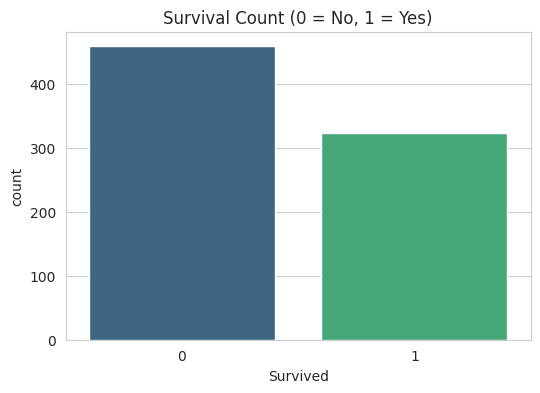

In [281]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="viridis")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

## Survival by Gender

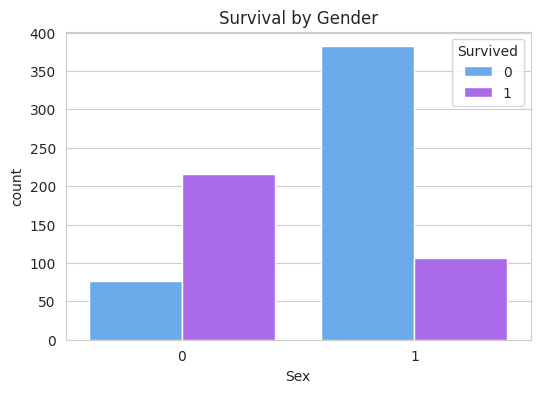

In [282]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="cool")
plt.title("Survival by Gender")
plt.show()


## Age distribution 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


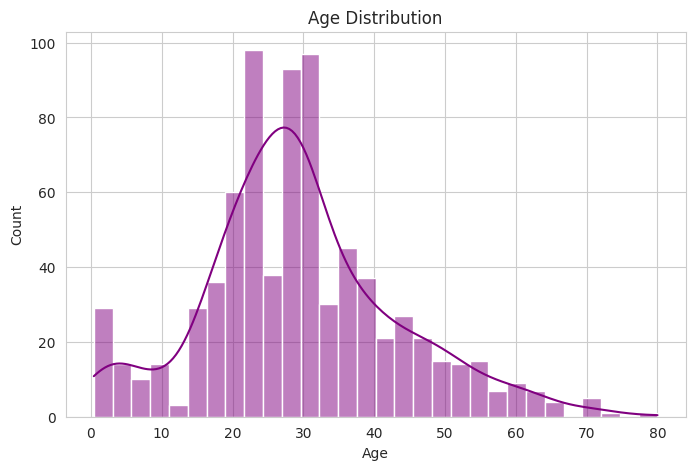

In [283]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="purple")
plt.title("Age Distribution")
plt.show()


### Age vs Survival using Boxplot

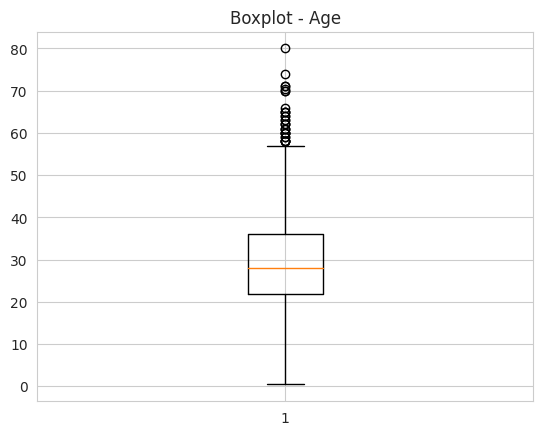

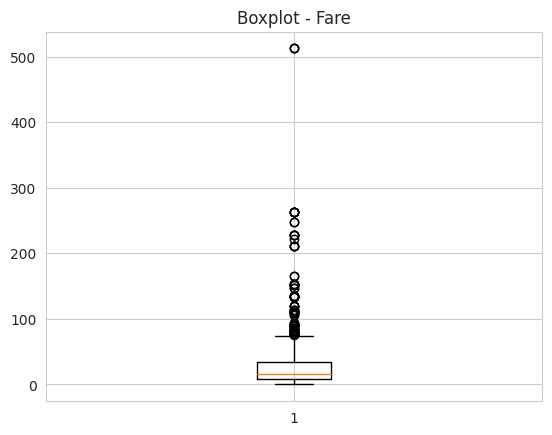

In [284]:
plt.boxplot(df['Age'].dropna())
plt.title("Boxplot - Age")
plt.show()

# Boxplot for Fare
plt.boxplot(df['Fare'].dropna())
plt.title("Boxplot - Fare")
plt.show()

# Standarrization

In [285]:
from sklearn.preprocessing import StandardScaler

In [286]:
f = StandardScaler()

In [287]:
df['Age_1'] = f.fit_transform(df[['Age']])

In [288]:
df['Fare_1'] = f.fit_transform(df[['Fare']])

In [289]:
df = df.drop(['Age', 'Fare'], axis=1)

In [290]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Fare_1
0,0,3,1,1,0,S,-0.545798,-0.528033
1,1,1,0,1,0,C,0.617790,0.697956
2,1,3,0,0,0,S,-0.254901,-0.515109
3,1,1,0,1,0,S,0.399617,0.349817
4,0,3,1,0,0,S,0.399617,-0.512716


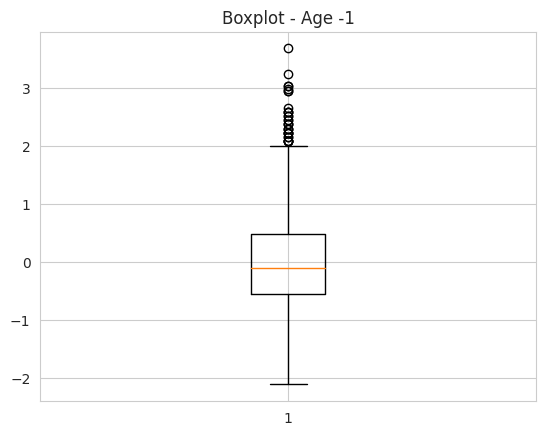

In [291]:
plt.boxplot(df['Age_1'].dropna())
plt.title("Boxplot - Age -1")
plt.show()

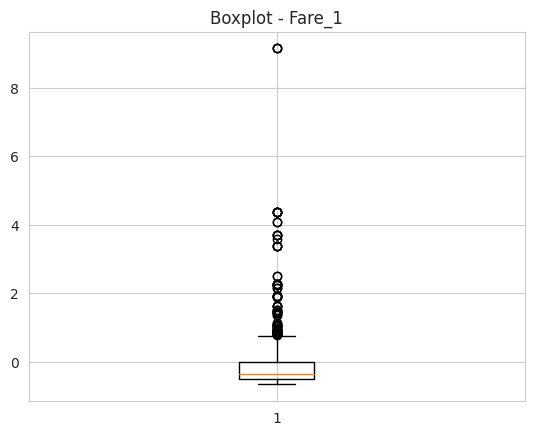

In [292]:
plt.boxplot(df['Fare_1'].dropna())
plt.title("Boxplot - Fare_1")
plt.show()

# Spliting The Data

In [295]:
first = df.drop(columns=['Survived'])   
second = df['Survived']                  

In [296]:
first

,Pclass,Sex,SibSp,Parch,Embarked,Age_1,Fare_1
0,3,1,1,0,S,-0.545798,-0.528033
1,1,0,1,0,C,0.617790,0.697956
2,3,0,0,0,S,-0.254901,-0.515109
3,1,0,1,0,S,0.399617,0.349817
4,3,1,0,0,S,0.399617,-0.512716
...,...,...,...,...,...,...,...
885,3,0,0,5,Q,0.690514,-0.109211
887,1,0,0,0,S,-0.763971,-0.092459
888,3,0,1,2,S,-0.400350,-0.217866
889,1,1,0,0,C,-0.254901,-0.092459


# Future Engineering